# Load Dataset


In [50]:
#for data manipulation
import numpy as numpy
import pandas as pd

#for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#for interactive analysis
from ipywidgets import interact

import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("dataset\data - data.csv")
print (data)

        N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]


# Missing Data Checking

<AxesSubplot:>

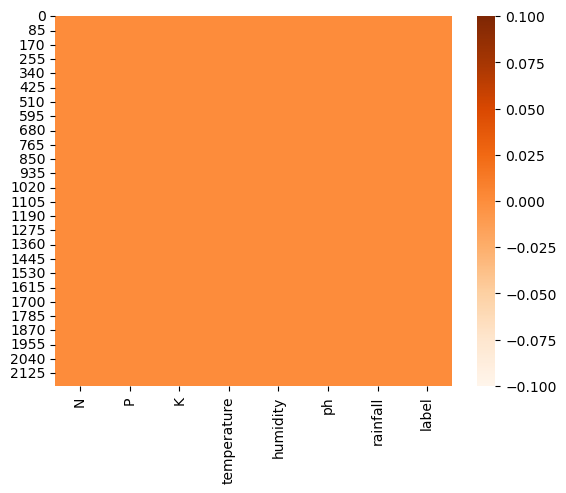

In [4]:
sns.heatmap(data.isnull(), cmap= "Oranges")

# Seasonal Crops

# Summer Season

In [7]:
print(data[(data['temperature']>30) & (data['humidity']>50)]['label'].unique())

['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']


# Winter Season

In [5]:
print(data[(data['temperature']<20) & (data['humidity']<50)]['label'].unique())

['chickpea' 'kidneybeans' 'pigeonpeas']


# Monsoon Season

In [6]:
print(data[(data['rainfall']>200) & (data['humidity']>40)]['label'].unique())

['rice' 'papaya' 'coconut']


# Crop-wise Requirements

In [8]:
@interact
def summary(crops=list(data['label'].value_counts().index)):
  x=data[data['label']==crops]
  #print(x)
  print("Minimum Nitrogen Required=",x['N'].min())
  print("Average Nitrogen Required=",x['N'].mean())
  print("Maximum Nitrogen Required=",x['N'].max())
  print("----------------------------------------------------------")
  print("Minimum Potassium Required=",x['K'].min())
  print("Average Potassium Required=",x['K'].mean())
  print("Maximum Potassium Required=",x['K'].max())
  print("----------------------------------------------------------")
  print("Minimum Phosphorous Required=",x['P'].min())
  print("Average Phosphorous Required=",x['P'].mean())
  print("Maximum Phosphorous Required=",x['P'].max())
  print("----------------------------------------------------------")
  print("Minimum Temperature Required=",x['temperature'].min())
  print("Average Temperature Required=",x['temperature'].mean())
  print("Maximum Temperature Required=",x['temperature'].max())
  print("----------------------------------------------------------")
  print("Minimum Rainfall Required=",x['rainfall'].min())
  print("Average Rainfall Required=",x['rainfall'].mean())
  print("Maximum Rainfall Required=",x['rainfall'].max())
  print("----------------------------------------------------------")
  print("Minimum Humidity Required=",x['humidity'].min())
  print("Average Humidity Required=",x['humidity'].mean())
  print("Maximum Humidity Required=",x['humidity'].max())
  print("----------------------------------------------------------")
  print("Minimum PH-level Required=",x['ph'].min())
  print("Average PH-level Required=",x['ph'].mean())
  print("Maximum PH-level Required=",x['ph'].max())
  print("----------------------------------------------------------")

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

# Graph for Multi-variance

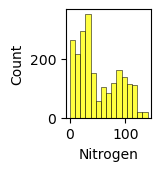

In [76]:
plt.subplot(3,5,1)
sns.histplot(data['N'],color="yellow")
plt.xlabel("Nitrogen")
# plt.grid()
plt.show()

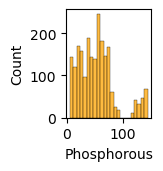

In [77]:
plt.subplot(3,5,1)
sns.histplot(data['P'],color="orange")
plt.xlabel("Phosphorous")
plt.show()

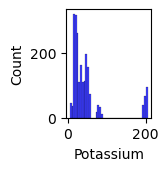

In [78]:
plt.subplot(3,5,1)
sns.histplot(data['K'],color="blue")
plt.xlabel("Potassium")
plt.show()

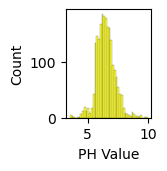

In [79]:
plt.subplot(3,5,1)
sns.histplot(data['ph'],color="yellow")
plt.xlabel("PH Value")
plt.show()

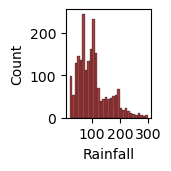

In [80]:
plt.subplot(3,5,1)
sns.histplot(data['rainfall'],color="maroon")
plt.xlabel("Rainfall")
plt.show()

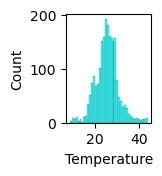

In [82]:
plt.subplot(3,5,1)
sns.histplot(data['temperature'],color="aqua")
plt.xlabel("Temperature")
plt.show()

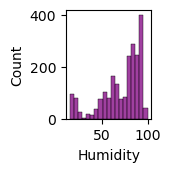

In [83]:
plt.subplot(3,5,1)
sns.histplot(data['humidity'],color="purple")
plt.xlabel("Humidity")
plt.show()

# Elbow Method

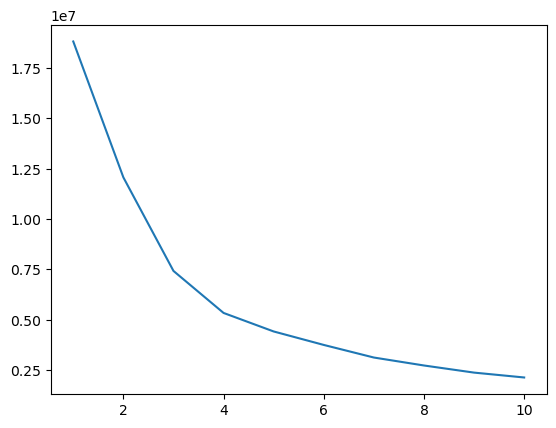

In [16]:
from pandas.core.common import random_state
from sklearn.cluster import KMeans 

x=data.drop(['label'], axis=1)
x=x.values
wcss=[]

for i in range(1,11):
  km=KMeans(n_clusters=i, init="k-means++", max_iter=2000, n_init=10, random_state=0)
  km.fit(x)
  wcss.append(km.inertia_)

plt.plot(range(1,11), wcss)
plt.show()  

In [17]:
km=KMeans(n_clusters=4, init="k-means++", max_iter=2000, n_init=10, random_state=0)
y_means=km.fit_predict(x)

a=data['label']
y_means=pd.DataFrame(y_means)
z=pd.concat([y_means, a], axis=1)

z=z.rename(columns={0:'cluster'})

print("Cluster 1", z[z['cluster']==0]['label'].unique())
print("Cluster 2", z[z['cluster']==1]['label'].unique())
print("Cluster 3", z[z['cluster']==2]['label'].unique())
print("Cluster 4", z[z['cluster']==3]['label'].unique())

Cluster 1 ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
Cluster 2 ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
Cluster 3 ['grapes' 'apple']
Cluster 4 ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


# Crop Prediction

In [24]:
y=data['label']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=0)

In [25]:
from sklearn.linear_model import LogisticRegression

model= LogisticRegression()
model.fit(x_train, y_train)
y_pred=model.predict(numpy.array([[20, 7, 10, 30, 90, 7, 100]]))

print(y_pred)

['orange']


In [26]:
y_pred=model.predict(x_test)
from sklearn.metrics import classification_report
cr=classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

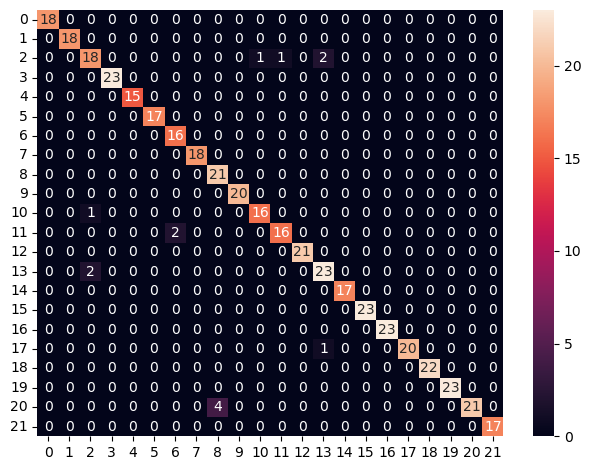

In [28]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.tight_layout()